<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv('Default.csv')

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [6]:
# first we look at target variable proportions:
pd.crosstab(df['default'],df['default'], normalize='all')*100

default,No,Yes
default,,
No,96.67,0.00
Yes,0.00,3.33


**Exercise**:It seems that the target variable is highly imbalanced. What is the implication for performance metrics? which metric should we use?

## Data preprocessing 

In [7]:
df.isna().sum()  

default    0
student    0
balance    0
income     0
dtype: int64

In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [10]:
df.describe()

,balance,income,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300,0.294400
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462905,0.000000,0.000000
50%,823.636973,34552.644800,0.000000,0.000000
75%,1166.308387,43807.729275,0.000000,1.000000
max,2654.322576,73554.233500,1.000000,1.000000


## Data visualization 

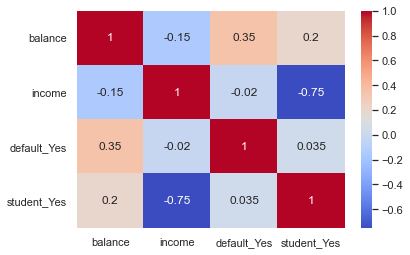

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

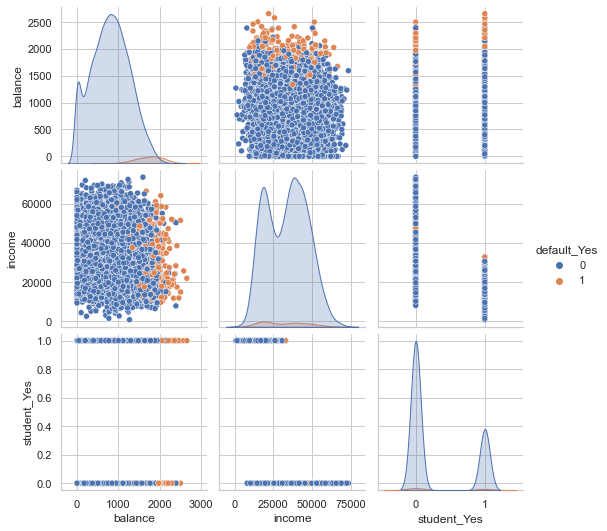

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='default_Yes', diag_kind= 'kde')

### Defining variables and splitting the data

In [13]:
y = df['default_Yes']
X = df.drop('default_Yes', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [14]:
X_train.head()

,balance,income,student_Yes
5697,380.173508,37395.71893,0
615,1052.393260,37637.65931,0
2733,813.494838,16681.35030,1
5961,0.000000,56610.23650,0
7039,1167.349090,16356.93057,1


In [15]:
y_train.head()

5697    0
615     0
2733    0
5961    0
7039    0
Name: default_Yes, dtype: uint8

##  Logistic regressions with Sklearn

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predicting the Test set probabilities and classes
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of defaults

In [19]:
np.round(logistic.predict_proba(X_test),3)

array([[0.993, 0.007],
       [0.999, 0.001],
       [0.996, 0.004],
       ...,
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.994, 0.006]])

Let's look at the histogram of probabilities of default:

In [20]:
np.max(y_hat_probs)

0.8576387486450953

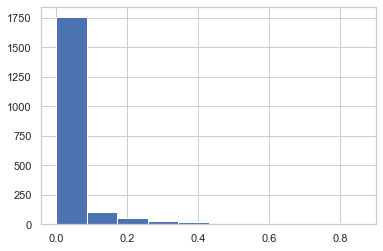

In [21]:
plt.hist(y_hat_probs)
plt.show()

By default the threshold is set to 0.5, i.e., credit card status are separated into No default and default categories according to whether the probability of default is greater or less than 0.5. However, this does not work well for an imbalanced data set such as this one (based on the histogram above). It would predict that all credit cards will not default and hence generating too many false negatives! to avoid all these false negatives we should reduce the threshold. Let's try 10% and 30% as well. 

In [22]:
y_hat_10 = np.where(y_hat_probs>0.10,1,0)
y_hat_30 = np.where(y_hat_probs>0.30,1,0)

In [23]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_10':y_hat_10, 'y_hat_30':y_hat_30})
df_predictions.tail()

,y_test,y_hat_probs,y_hat_10,y_hat_30
9341,0,0.024028,0,0
9271,1,0.172101,1,0
3781,0,0.000333,0,0
5474,0,0.001535,0,0
7271,0,0.005582,0,0


### Performance metrics:

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [25]:
print(confusion_matrix(y_test, y_hat))

[[1926   18]
 [  43   13]]


#### Built-in classification report

In [26]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1944
           1       0.42      0.23      0.30        56

    accuracy                           0.97      2000
   macro avg       0.70      0.61      0.64      2000
weighted avg       0.96      0.97      0.97      2000



### Defining my own logistic regression report:

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [28]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.97
Precision = 0.42
Recall    = 0.23
f1_score  = 0.3
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,1926,18
Actual : positive,43,13


**Exercise**: What will happen to my_logistic_report outputs if threshold=0.1? What about 0.9? what about 0.0001?

**Challenge**: If as a lending company, your profit is defined as below: 

$(TN*V) - (FN*V)$   where V=constant dollar amount, then which threshold will maximize your profit? 0.1, 0.5 or 0.9

---

### ROC and AUC 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.928


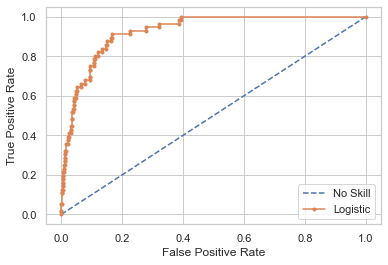

In [29]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Exercise**: Are you excited about the high AUC? why?

---

##  Cross validation

There is no hyper parameter in logistic regression. So we can use cross validation only to get an estimate for the accuracy in the test set.

In [30]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [31]:
# remember we saved our model in an object called "logistic"
f1 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="f1" )

In [32]:
f1

array([0.28235294, 0.31884058, 0.28985507, 0.24657534, 0.225     ])

In [33]:
f1_CV=round(f1.mean(),2)
f1_CV

0.27

----------------

### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [34]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [35]:
X= df[['balance', 'income']]
y= df[['default_Yes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [36]:
X_train.head()

,balance,income
6861,432.092065,56732.73728
9881,980.037169,31977.56333
4536,458.967737,18444.29785
8430,440.024543,49358.42579
6765,360.574949,42217.38292


In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 

In [38]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train.values.reshape(-1,))

LogisticRegression()

In [39]:
# Predicting the Test set results
y_pred = logistic.predict(X_test)
y_train_pred = logistic.predict(X_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


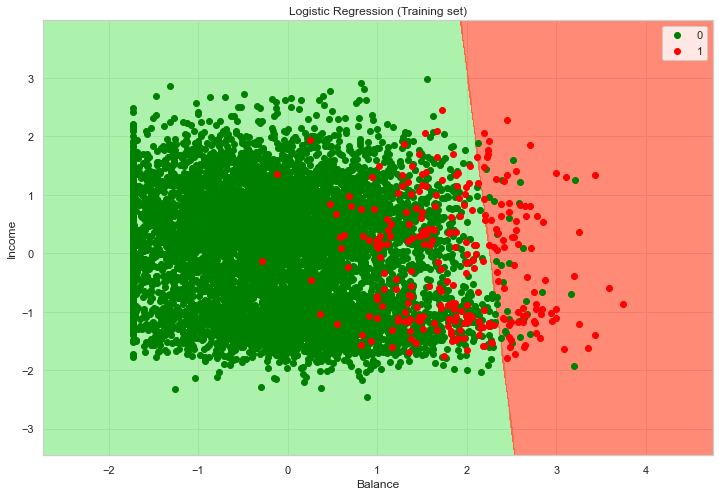

In [40]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(( '#90EE90','#FF6347')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


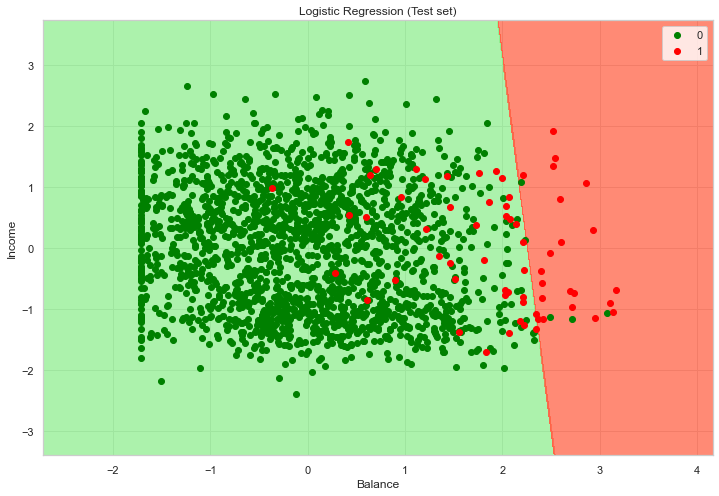

In [41]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(( '#90EE90','#FF6347')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.legend()
plt.show()

---

Let's make a full classification report + ROC curve function :)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_logistic_report_ROC(X_train, y_train, X_test,y_test, threshold=0.5):
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    

    # generate a no skill (ns) prediction and logistic regression (lr) predictions.
    ns_probs = [0 for i in range(len(y_test))]
    lr_probs = logistic.predict_proba(X_test)[:,1]
    # calculating scores for no skill and logistic regression
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    print('\n')
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    print("---------------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("---------------------------------------------")
    return cm_labled
 
    




No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944


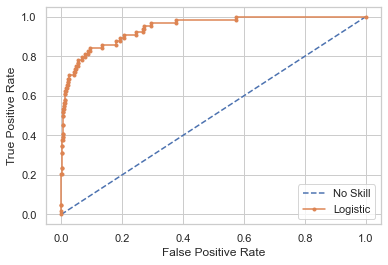

---------------------------------------------
Accuracy  = 0.98
Precision = 0.85
Recall    = 0.34
f1_score  = 0.49
---------------------------------------------


,Predict : negative,Predict :positive
Actual : negative,1932,4
Actual : positive,42,22


In [43]:
my_logistic_report_ROC(X_train, y_train, X_test,y_test, threshold=0.5)

###  Additional links:
1. Why logistic regression is a linear classifier: https://homes.cs.washington.edu/~marcotcr/blog/linear-classifiers/
2. Is accuracy everything? https://towardsdatascience.com/is-accuracy-everything-96da9afd540d
3. micro, macro, weighted average in classification report: https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score
4. ROC Curves and Precision-Recall Curves for Imbalanced Classification: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
